### PROBLEM STATEMENT

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and then the company validates the customer loan eligiblity. The company wants to automate the loan eligibility process (real time) based on customer detail provided while filling the online loan application form. The details which are required in the application form are - Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. 

To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.


### Step 1: Read and understand the data

In [1]:
#Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
#Read train and test data

df1 = pd.read_csv('data/loan sanction train.csv')
df2 = pd.read_csv('data/loan sanction test.csv')

In [3]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Here we have 12 independent variables and 1 dependent variable (Loan_Status)

In [5]:
#Check for null values
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#List of numerical columns

numerical_cols = df1.select_dtypes([np.number]).columns
print('Numerical columns: ', numerical_cols)

Numerical columns:  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [7]:
#List of categorical columns

categorical_cols = df1.select_dtypes('object').drop(['Loan_ID', 'Loan_Status'],axis=1).columns
print('Categorical columns: ', categorical_cols)

Categorical columns:  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')


**Analysing the distribution of numerical features for all applicants in cases when loan is accepted and rejected**

Numerical features include:
* Applicant Income
* Co Applicant Income
* Loan Amount
* Loan Amount Term

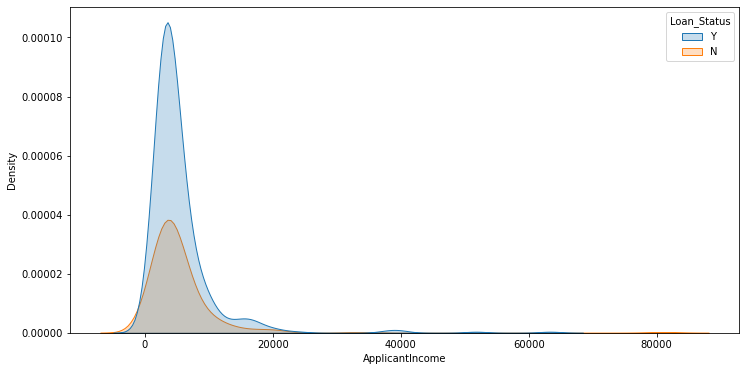

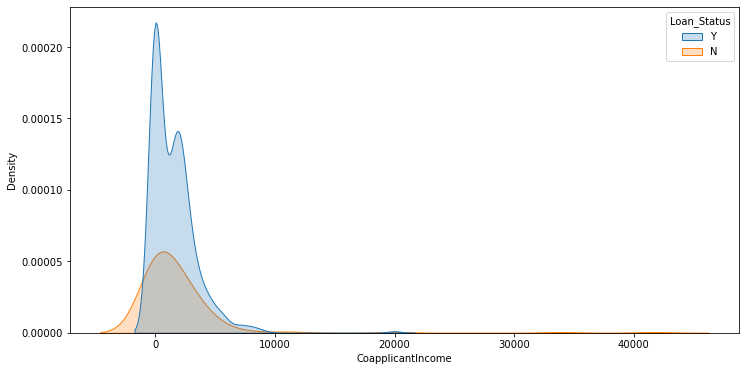

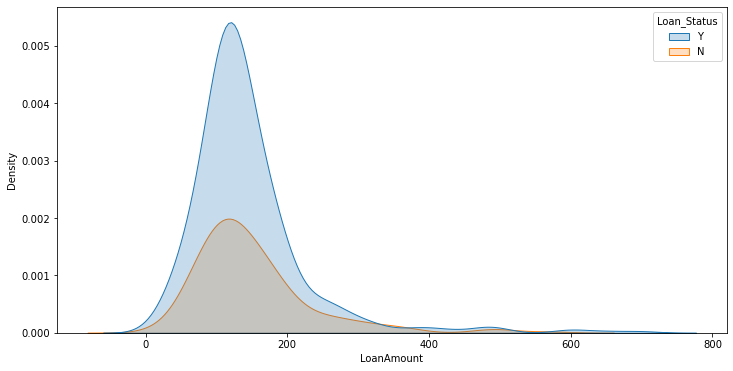

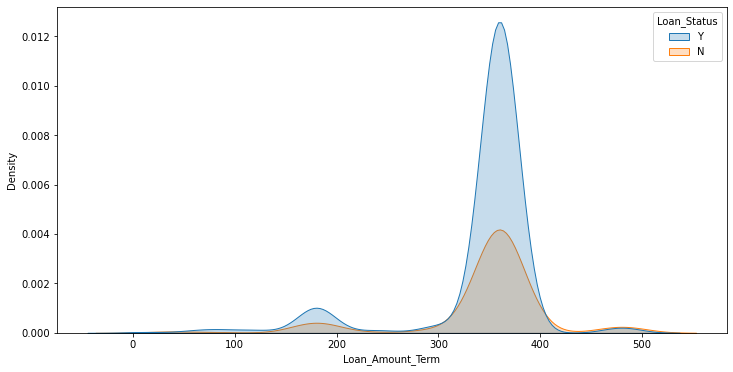

In [8]:
#Numerical feature vs loan status

for nc in numerical_cols:
    if nc == 'Credit_History':
        continue
    plt.figure(figsize=(12,6))
    sns.kdeplot(data=df1,x=nc,hue='Loan_Status',shade=True)
    plt.show()

**INFERENCE**
* Majority of the applicants have income within 15000
* Majority of the co applicants have income within 8000
* Majority of the applicants have loan amount within 200
* Majority of the applicants have loan term amount between 300 and 400

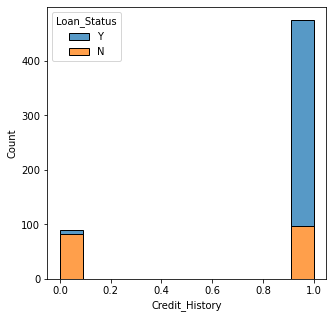

In [9]:
#Credit history and loan status count in cases when loan is accepted and rejected

plt.figure(figsize=(5,5))
sns.histplot(data=df1,x='Credit_History',hue='Loan_Status',multiple='stack')
plt.show()

**INFERENCE**
* Majority of the people with credit history = 1 have got their loan approved
* Very less people with credit history = 0 have got their loan approved 

**Analyzing the distribution of categorical features in cases when loan is accepted and rejected**

Categorical features include:
* Gender
* Married
* Number of Dependents
* Education
* Self Employeed
* Property Area

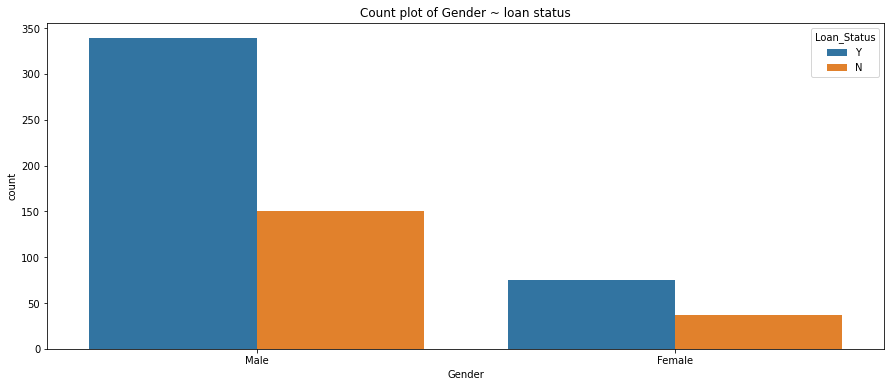

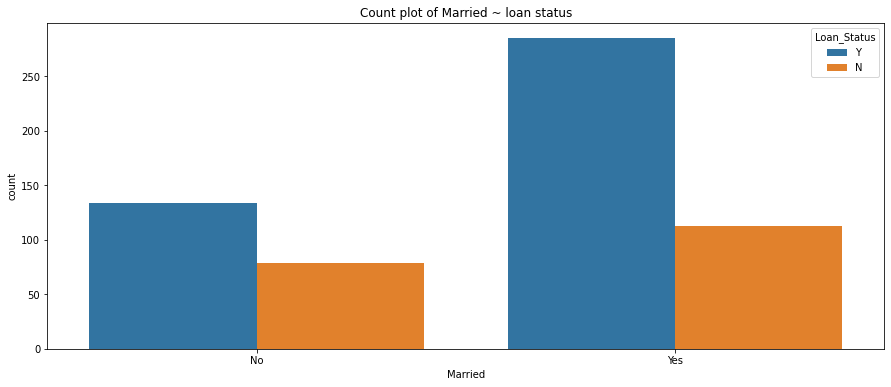

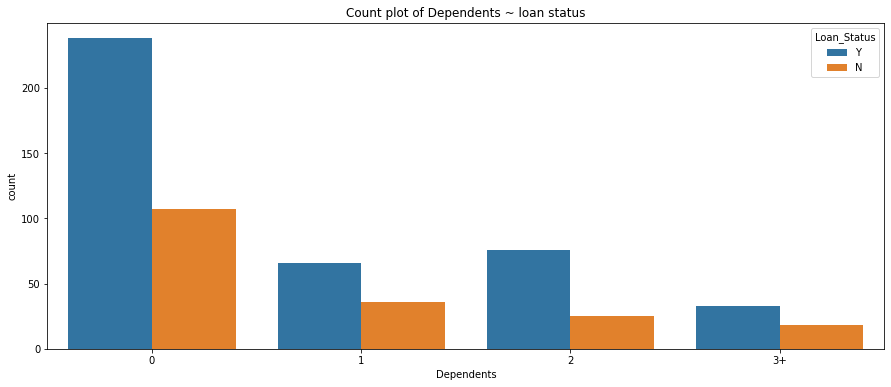

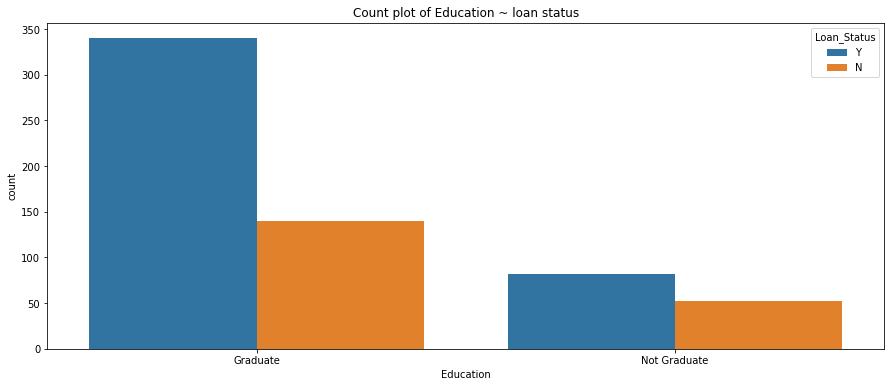

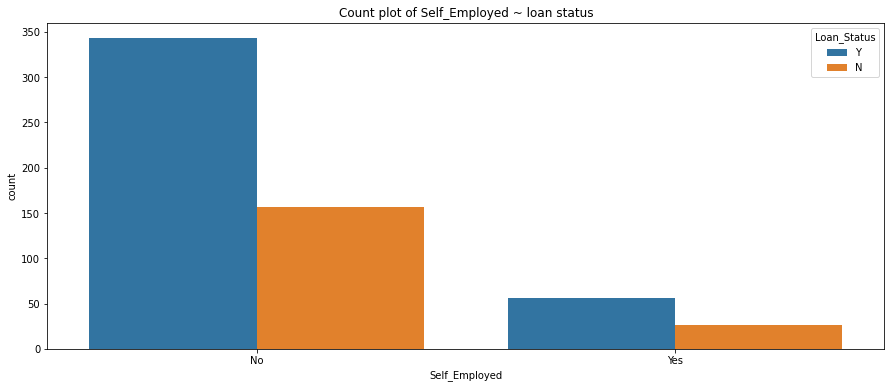

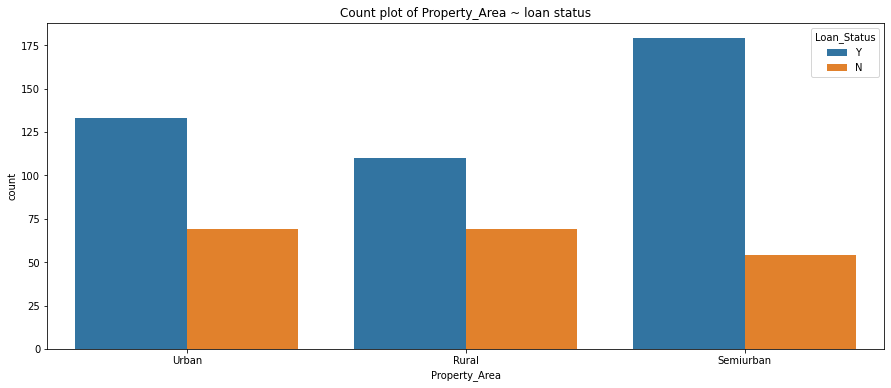

In [10]:
#Categorical feature vs loan status

for cc in categorical_cols:
    plt.figure(figsize=(15,6))
    sns.countplot(data=df1,x=cc,hue='Loan_Status')
    plt.title('Count plot of {} ~ loan status'.format(cc))
    plt.show()

## INFERNENCE

### GENDER

In [13]:
#Count of loan status (Y and N) for available gender
def GenderVsLoanStatus(gender):
    print('Total {} applicants: {}'.format(gender,df1[df1.Gender==gender].shape[0]))
    print('{} applicants with loan approved: {}'.format(gender,df1[(df1.Gender==gender) & (df1.Loan_Status=='Y')].shape[0]))
    print('{} applicants with loan not approved: {}'.format(gender,df1[(df1.Gender==gender) & (df1.Loan_Status=='N')].shape[0]))

**MALE APPLICANTS ~ LOAN STATUS**

In [14]:
GenderVsLoanStatus('Male')

Total Male applicants: 489
Male applicants with loan approved: 339
Male applicants with loan not approved: 150


**FEMALE APPLICANTS ~ LOAN STATUS**

In [15]:
GenderVsLoanStatus('Female')

Total Female applicants: 112
Female applicants with loan approved: 75
Female applicants with loan not approved: 37


### MARITAL STATUS

In [16]:
#Count of loan status (Y and N) for available marital status
def MaritalStatusVsLoanStatus(status):
    print('Total applicants with married status {}: {}'.format(status,df1[df1.Married==status].shape[0]))
    print('Applicants with marital status {} & loan approved: {}'.format(status,df1[(df1.Married==status) & (df1.Loan_Status=='Y')].shape[0]))
    print('Applicants with marital status {} & loan not approved: {}'.format(status,df1[(df1.Married==status) & (df1.Loan_Status=='N')].shape[0]))

**MARITAL STATUS YES APPLICANTS ~ LOAN STATUS**

In [17]:
MaritalStatusVsLoanStatus('Yes')

Total applicants with married status Yes: 398
Applicants with marital status Yes & loan approved: 285
Applicants with marital status Yes & loan not approved: 113


**MARITAL STATUS NO APPLICANTS ~ LOAN STATUS**

In [18]:
MaritalStatusVsLoanStatus('No')

Total applicants with married status No: 213
Applicants with marital status No & loan approved: 134
Applicants with marital status No & loan not approved: 79


### DEPENDENTS

In [19]:
#Count of loan status (Y and N) for available dependents
def DependentsStatusVsLoanStatus(dependents):
    print('Total applicants with dependents {}: {}'.format(dependents,df1[df1.Dependents==dependents].shape[0]))
    print('Applicants with dependents {} & loan approved: {}'.format(dependents,df1[(df1.Dependents==dependents) & (df1.Loan_Status=='Y')].shape[0]))
    print('Applicants with dependents {} & loan not approved: {}'.format(dependents,df1[(df1.Dependents==dependents) & (df1.Loan_Status=='N')].shape[0]))

**0 DEPENDENTS ~ LOAN STATUS**

In [20]:
DependentsStatusVsLoanStatus('0')

Total applicants with dependents 0: 345
Applicants with dependents 0 & loan approved: 238
Applicants with dependents 0 & loan not approved: 107


**1 DEPENDENT ~ LOAN STATUS**

In [21]:
DependentsStatusVsLoanStatus('1')

Total applicants with dependents 1: 102
Applicants with dependents 1 & loan approved: 66
Applicants with dependents 1 & loan not approved: 36


**2 DEPENDENTS ~ LOAN STATUS**

In [22]:
DependentsStatusVsLoanStatus('2')

Total applicants with dependents 2: 101
Applicants with dependents 2 & loan approved: 76
Applicants with dependents 2 & loan not approved: 25


**3+ DEPENDENTS ~ LOAN STATUS**

In [23]:
DependentsStatusVsLoanStatus('3+')

Total applicants with dependents 3+: 51
Applicants with dependents 3+ & loan approved: 33
Applicants with dependents 3+ & loan not approved: 18


### EDUCATION

In [24]:
#Count of loan status (Y and N) for available education status
def EducationStatusVsLoanStatus(edu):
    print('Total applicants with Education {}: {}'.format(edu,df1[df1.Education==edu].shape[0]))
    print('Applicants with Education {} & loan approved: {}'.format(edu,df1[(df1.Education==edu) & (df1.Loan_Status=='Y')].shape[0]))
    print('Applicants with Education {} & loan not approved: {}'.format(edu,df1[(df1.Education==edu) & (df1.Loan_Status=='N')].shape[0]))

**GRADUATE EDUCATION ~ LOAN STATUS**

In [25]:
EducationStatusVsLoanStatus('Graduate')

Total applicants with Education Graduate: 480
Applicants with Education Graduate & loan approved: 340
Applicants with Education Graduate & loan not approved: 140


**NOT GRADUATE EDUCATION ~ LOAN STATUS**

In [26]:
EducationStatusVsLoanStatus('Not Graduate')

Total applicants with Education Not Graduate: 134
Applicants with Education Not Graduate & loan approved: 82
Applicants with Education Not Graduate & loan not approved: 52


### SELF EMPLOYED

In [27]:
#Count of loan status (Y and N) for available self employed status
def SelfEmployedStatusVsLoanStatus(selfEmp):
    print('Total applicants with Self Employed status {}: {}'.format(selfEmp,df1[df1.Self_Employed==selfEmp].shape[0]))
    print('Applicants with Self Employed status {} & loan approved: {}'.format(selfEmp,df1[(df1.Self_Employed==selfEmp) & (df1.Loan_Status=='Y')].shape[0]))
    print('Applicants with Self Employed status {} & loan not approved: {}'.format(selfEmp,df1[(df1.Self_Employed==selfEmp) & (df1.Loan_Status=='N')].shape[0]))

**SELF EMPLOYED STATUS YES ~ LOAN STATUS**

In [28]:
SelfEmployedStatusVsLoanStatus('Yes')

Total applicants with Self Employed status Yes: 82
Applicants with Self Employed status Yes & loan approved: 56
Applicants with Self Employed status Yes & loan not approved: 26


**SELF EMPLOYED STATUS NO ~ LOAN STATUS**

In [29]:
SelfEmployedStatusVsLoanStatus('No')

Total applicants with Self Employed status No: 500
Applicants with Self Employed status No & loan approved: 343
Applicants with Self Employed status No & loan not approved: 157


### PROPERTY TYPE

In [30]:
#Count of loan status (Y and N) for available property types
def PropertyAreaTypeVsLoanStatus(propType):
    print('Total applicants with Property Area Type {}: {}'.format(propType,df1[df1.Property_Area==propType].shape[0]))
    print('Applicants with Property Area Type {} & loan approved: {}'.format(propType,df1[(df1.Property_Area==propType) & (df1.Loan_Status=='Y')].shape[0]))
    print('Applicants with Property Area Type {} & loan not approved: {}'.format(propType,df1[(df1.Property_Area==propType) & (df1.Loan_Status=='N')].shape[0]))

**URBAN PROPERTY AREA TYPE ~ LOAN STATUS**

In [31]:
PropertyAreaTypeVsLoanStatus('Urban')

Total applicants with Property Area Type Urban: 202
Applicants with Property Area Type Urban & loan approved: 133
Applicants with Property Area Type Urban & loan not approved: 69


**RURAL PROPERTY AREA TYPE ~ LOAN STATUS**

In [32]:
PropertyAreaTypeVsLoanStatus('Rural')

Total applicants with Property Area Type Rural: 179
Applicants with Property Area Type Rural & loan approved: 110
Applicants with Property Area Type Rural & loan not approved: 69


**SEMI URBAN PROPERTY AREA TYPE ~ LOAN STATUS**

In [33]:
PropertyAreaTypeVsLoanStatus('Semiurban')

Total applicants with Property Area Type Semiurban: 233
Applicants with Property Area Type Semiurban & loan approved: 179
Applicants with Property Area Type Semiurban & loan not approved: 54


### Step 2: Processing the data

* 'Dependents column has a '3+' value. We'll modify it to 3 and convert all entries to int
* Columns like Gender, Married, Education and Self employed have 2 values. We'll map it to 0 and 1
* Properties column has 3 values - urban, semi urban and rural. We'll transform this using one hot encoding
* Loan_ID is not significant here hence we'll drop it

In [34]:
#Processing the data
def dataProcessing(df):
    df = df.dropna()
    
    #Dependents as 3+ as a value, we'll replace it with 3 and covert the column to int
    df['Dependents'] = df['Dependents'].replace('3+',3)
    df['Dependents'] = df['Dependents'].astype(int)
    
    #Some columns have 2 values - Gender, Married, Education, Self_Employed. Converting them to binary format
    df['Gender']=df['Gender'].map({'Male':1,'Female':0})
    df['Married']=df['Married'].map({'Yes':1,'No':0})
    df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})
    df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})
    
    #Loan_ID is not important for us
    df = df.drop('Loan_ID', axis=1)
    
    #One hot encoding Property_Area feature (Urban, Rural, Semiurban)
    ohe = OneHotEncoder(sparse=False)
    transformed = ohe.fit_transform(df[['Property_Area']])
    
    df[ohe.categories_[0]]=transformed
    df=df.drop('Property_Area',axis=1)
    
    return df
    
    

In [35]:
df_train = dataProcessing(df1)

<ipython-input-34-02e072519538>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dependents'] = df['Dependents'].replace('3+',3)
<ipython-input-34-02e072519538>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dependents'] = df['Dependents'].astype(int)
<ipython-input-34-02e072519538>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [36]:
df_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,N,1.0,0.0,0.0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Y,0.0,0.0,1.0
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Y,0.0,0.0,1.0
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Y,0.0,0.0,1.0
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,Y,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,Y,1.0,0.0,0.0
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,Y,1.0,0.0,0.0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,Y,0.0,0.0,1.0
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,Y,0.0,0.0,1.0


In [37]:
df_train['Loan_Status']=df_train['Loan_Status'].map({'Y':1,'N':0})
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,1.0,0.0,0.0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,0.0,0.0,1.0
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,0.0,0.0,1.0
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,0.0,0.0,1.0
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,0.0,0.0,1.0


In [38]:
y = df_train['Loan_Status']

In [40]:
X = df_train.drop('Loan_Status', axis=1)

**Train and test splitting. Test set is taken as 20% of total data**

In [41]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)

In [42]:
print(X_train.shape)
print(X_val.shape)

(384, 13)
(96, 13)


### Step 3: Model building 

In [59]:
rf_model1 = RandomForestClassifier(n_estimators=500, max_depth=10)
rf_model1.fit(X_train,y_train)
model1_trainPred = rf_model1.predict(X_train)
print(classification_report(y_train, model1_trainPred))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       124
           1       0.93      1.00      0.96       260

    accuracy                           0.95       384
   macro avg       0.96      0.92      0.94       384
weighted avg       0.95      0.95      0.95       384



In [61]:
model1_testPred = rf_model1.predict(X_val)
print(classification_report(y_val, model1_testPred))

              precision    recall  f1-score   support

           0       0.87      0.54      0.67        24
           1       0.86      0.97      0.92        72

    accuracy                           0.86        96
   macro avg       0.87      0.76      0.79        96
weighted avg       0.86      0.86      0.85        96



In [62]:
len(X_train.columns)

13

In [46]:
import pickle

file = open('LoanPrediction.pkl', 'wb')

# dump information to that file
pickle.dump(rf_model1, file)

In [47]:
X_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Rural', 'Semiurban', 'Urban'],
      dtype='object')